# Import libraries and files

In [1]:
import numpy as np
import nibabel.processing as nibp
import os
import nibabel as nib

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip gdrive/MyDrive/dataset/sub-01_T1w_preproc.nii.gz

Archive:  gdrive/MyDrive/dataset/sub-01_T1w_preproc.nii.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of gdrive/MyDrive/dataset/sub-01_T1w_preproc.nii.gz or
        gdrive/MyDrive/dataset/sub-01_T1w_preproc.nii.gz.zip, and cannot find gdrive/MyDrive/dataset/sub-01_T1w_preproc.nii.gz.ZIP, period.


In [4]:
!unzip gdrive/MyDrive/dataset/sub-01_T1w_class-GM_probtissue.nii.gz

Archive:  gdrive/MyDrive/dataset/sub-01_T1w_class-GM_probtissue.nii.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of gdrive/MyDrive/dataset/sub-01_T1w_class-GM_probtissue.nii.gz or
        gdrive/MyDrive/dataset/sub-01_T1w_class-GM_probtissue.nii.gz.zip, and cannot find gdrive/MyDrive/dataset/sub-01_T1w_class-GM_probtissue.nii.gz.ZIP, period.


In [5]:
!unzip gdrive/MyDrive/dataset/sub-01_T1w_class-WM_probtissue.nii.gz

Archive:  gdrive/MyDrive/dataset/sub-01_T1w_class-WM_probtissue.nii.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of gdrive/MyDrive/dataset/sub-01_T1w_class-WM_probtissue.nii.gz or
        gdrive/MyDrive/dataset/sub-01_T1w_class-WM_probtissue.nii.gz.zip, and cannot find gdrive/MyDrive/dataset/sub-01_T1w_class-WM_probtissue.nii.gz.ZIP, period.


In [6]:
!unzip gdrive/MyDrive/dataset/sub-01_T1w_class-CSF_probtissue.nii.gz

Archive:  gdrive/MyDrive/dataset/sub-01_T1w_class-CSF_probtissue.nii.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of gdrive/MyDrive/dataset/sub-01_T1w_class-CSF_probtissue.nii.gz or
        gdrive/MyDrive/dataset/sub-01_T1w_class-CSF_probtissue.nii.gz.zip, and cannot find gdrive/MyDrive/dataset/sub-01_T1w_class-CSF_probtissue.nii.gz.ZIP, period.


In [7]:
!unzip gdrive/MyDrive/dataset/sub-01_ses-localizer_task-objectcategories_run-1_bold_space-T1w_preproc.nii.gz

Archive:  gdrive/MyDrive/dataset/sub-01_ses-localizer_task-objectcategories_run-1_bold_space-T1w_preproc.nii.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of gdrive/MyDrive/dataset/sub-01_ses-localizer_task-objectcategories_run-1_bold_space-T1w_preproc.nii.gz or
        gdrive/MyDrive/dataset/sub-01_ses-localizer_task-objectcategories_run-1_bold_space-T1w_preproc.nii.gz.zip, and cannot find gdrive/MyDrive/dataset/sub-01_ses-localizer_task-objectcategories_run-1_bold_space-T1w_preproc.nii.gz.ZIP, period.


# Make masks

Make gray matter mask

In [8]:
# load functional data
#filepath_func = 'sub-01_task-sherlockPart1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
#func = nib.load(filepath_func)
#print(func.affine)

In [9]:
# load functional data
filepath_func = 'gdrive/MyDrive/dataset/sub-01_ses-localizer_task-objectcategories_run-1_bold_space-T1w_preproc.nii.gz'
func = nib.load(filepath_func)

print(func)
print(func.affine)

#transform from space of voxels to space of millimeters
#voxel size: x,y =3,z = 3.3 milimeters; 3*voxel location + starting coordinate. middle of the brain = 0; positive = right side of brain; negative = left


<class 'nibabel.nifti1.Nifti1Image'>
data shape (49, 62, 48, 156)
affine: 
[[  3.           0.           0.         -68.28421021]
 [  0.           3.           0.         -73.51255798]
 [  0.           0.           3.29999995 -80.62020111]
 [  0.           0.           0.           1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  49  62  48 156   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        3.        3.        3.3       2.0000007 1.        1.
 1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 8
cal_max         : 709.4388
cal_min         : -83.836174


In [10]:
# load anatomical data
filepath_anat = 'gdrive/MyDrive/dataset/sub-01_T1w_preproc.nii.gz'
anat = nib.load(filepath_anat)
print(anat.shape)

#print(func.affine)

(274, 384, 384)


In [11]:
import matplotlib.pyplot as plt
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

#print(func.get_fdata()[0,:,:])
#show_slices([func.get_fdata()[140, :, :],
#             func.get_fdata()[:, 140, :],
#             func.get_fdata()[:, :, 140]])

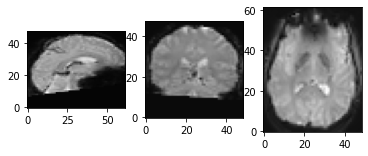

In [12]:
show_slices([func.get_fdata()[24, :, :, 0],
             func.get_fdata()[:, 24, :, 0],
             func.get_fdata()[:, :, 24, 0]])

In [13]:
## load gray matter
#filepath_gm = './sub-01_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz'
#gm = nib.load(filepath_gm)
#print(gm.affine)

In [14]:
# load gray matter
filepath_gm = 'gdrive/MyDrive/dataset/sub-01_T1w_class-GM_probtissue.nii.gz'
gm = nib.load(filepath_gm)
print(gm.affine)
print(gm.shape)

[[ 6.93359315e-01  4.50425558e-02  7.98166469e-02 -1.16284210e+02]
 [-3.23181227e-02  6.55866504e-01 -1.15482718e-01 -6.84598312e+01]
 [-9.06430706e-02  1.10701263e-01  6.51718795e-01 -1.61474640e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(274, 384, 384)


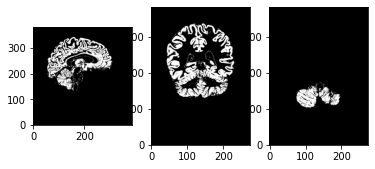

In [15]:
show_slices([gm.get_fdata()[140, :, :],
             gm.get_fdata()[:, 140, :],
             gm.get_fdata()[:, :, 140]])

In [16]:
# resize gray matter
func0 = func.slicer[:,:,:,0]
gm_funcSize=nibp.resample_from_to(gm, func0)
print(gm_funcSize.affine)

[[  3.           0.           0.         -68.28421021]
 [  0.           3.           0.         -73.51255798]
 [  0.           0.           3.29999995 -80.62020111]
 [  0.           0.           0.           1.        ]]


In [17]:
# discretize gray matter
gm_values = gm_funcSize.get_fdata()
gm_mask = (gm_values>0.1)

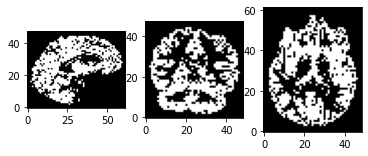

In [18]:
show_slices([gm_mask[24, :, :],
             gm_mask[:, 24, :],
             gm_mask[:, :, 24]])

Make mask for regions of no interest ("confounds mask")

In [19]:
# load white matter and csf
#filepath_wm = 'sub-01_space-MNI152NLin2009cAsym_label-WM_probseg.nii.gz'
#wm = nib.load(filepath_wm)
#print(wm.affine)
#filepath_csf = 'sub-01_space-MNI152NLin2009cAsym_label-CSF_probseg.nii.gz'
#csf = nib.load(filepath_csf)
#print(csf.affine)

In [20]:
# load white matter and csf
filepath_wm = 'gdrive/MyDrive/dataset/sub-01_T1w_class-WM_probtissue.nii.gz'
wm = nib.load(filepath_wm)
print(wm.affine)
filepath_csf = 'gdrive/MyDrive/dataset/sub-01_T1w_class-CSF_probtissue.nii.gz'
csf = nib.load(filepath_csf)
print(csf.affine)

[[ 6.93359315e-01  4.50425558e-02  7.98166469e-02 -1.16284210e+02]
 [-3.23181227e-02  6.55866504e-01 -1.15482718e-01 -6.84598312e+01]
 [-9.06430706e-02  1.10701263e-01  6.51718795e-01 -1.61474640e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 6.93359315e-01  4.50425558e-02  7.98166469e-02 -1.16284210e+02]
 [-3.23181227e-02  6.55866504e-01 -1.15482718e-01 -6.84598312e+01]
 [-9.06430706e-02  1.10701263e-01  6.51718795e-01 -1.61474640e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [21]:
# resize white matter and csf
wm_funcSize=nibp.resample_from_to(wm, func0)
print(wm_funcSize.affine)
csf_funcSize=nibp.resample_from_to(csf, func0)
print(csf_funcSize.affine)

[[  3.           0.           0.         -68.28421021]
 [  0.           3.           0.         -73.51255798]
 [  0.           0.           3.29999995 -80.62020111]
 [  0.           0.           0.           1.        ]]
[[  3.           0.           0.         -68.28421021]
 [  0.           3.           0.         -73.51255798]
 [  0.           0.           3.29999995 -80.62020111]
 [  0.           0.           0.           1.        ]]


In [22]:
# discretize white matter and csf and make confounds mask
wm_values = wm_funcSize.get_fdata()
csf_values = csf_funcSize.get_fdata()
confounds_values = (wm_values+csf_values)/2
confounds_mask = (confounds_values>0.1)

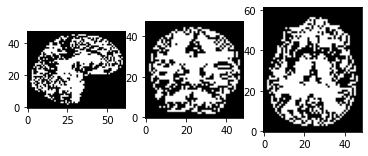

In [23]:
show_slices([confounds_mask[24, :, :],
             confounds_mask[:, 24, :],
             confounds_mask[:, :, 24]])

# Extract functional data

In [24]:
# Extract functional data from masks
func_values = func.get_fdata()
func_reshaped = np.reshape(func_values,[func.shape[0]*func.shape[1]*func.shape[2],func.shape[3]])
gm_reshaped = np.reshape(gm_mask,-1)
confounds_mask_reshaped = np.reshape(confounds_mask,-1)
diff = gm_reshaped & confounds_mask_reshaped
gm_reshaped_c = gm_reshaped ^ diff
confounds_mask_reshaped_c = confounds_mask_reshaped ^ diff
func_gm = func_reshaped[gm_reshaped_c,:] # these are the functional data in gray matter
func_confounds = func_reshaped[confounds_mask_reshaped_c,:] # these are the functional data in the regions of no interest
print(func_gm.shape)
print(func_confounds.shape)

(19734, 156)
(22686, 156)


Text(0.5, 1.0, 'cf')

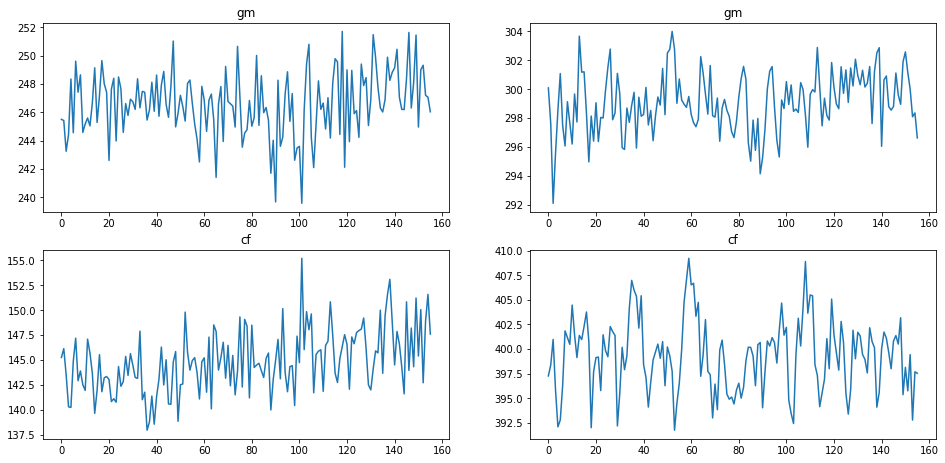

In [25]:
x = [i for i in range(156)]
plt.figure(figsize = (16,16))
plt.subplot(4,2,1)
plt.plot(x,func_gm[0],'-')
plt.title('gm')
plt.subplot(4,2,2)
plt.plot(x,func_gm[15],'-')
plt.title('gm')
plt.subplot(4,2,3)
plt.plot(x,func_confounds[47],'-')
plt.title('cf')
plt.subplot(4,2,4)
plt.plot(x,func_confounds[900],'-')
plt.title('cf')

# DataLoader

In [26]:
# data split
from sklearn.model_selection import train_test_split
training_gm, remaining_gm = train_test_split(func_gm, test_size=0.4, random_state=42)
validating_gm, testing_gm = train_test_split(remaining_gm, test_size=0.5, random_state=42)
training_cf, remaining_cf = train_test_split(func_confounds, test_size=0.4, random_state=42)
validating_cf, testing_cf = train_test_split(remaining_cf, test_size=0.5, random_state=42)

In [27]:
# dataloading 
import torch
train_gm = torch.utils.data.DataLoader(training_gm, batch_size=64,
                                             shuffle=True, num_workers=1)
validation_gm = torch.utils.data.DataLoader(validating_gm, batch_size=64,
                                             shuffle=True, num_workers=1)
test_gm = torch.utils.data.DataLoader(testing_gm, batch_size=64,
                                             shuffle=True, num_workers=1)

train_cf = torch.utils.data.DataLoader(training_cf, batch_size=64,
                                             shuffle=True, num_workers=1)
validation_cf = torch.utils.data.DataLoader(validating_cf, batch_size=64,
                                             shuffle=True, num_workers=1)
test_cf = torch.utils.data.DataLoader(testing_cf, batch_size=64,
                                             shuffle=True, num_workers=1)

In [28]:
max_gm = np.max(func_gm)
max_cf = np.max(func_confounds)

# cVAE model

In [29]:
from typing import List, Callable, Union, Any, TypeVar, Tuple
# from torch import tensor as Tensor

Tensor = TypeVar('torch.tensor')

In [30]:
import torch
from torch import nn
from torch.nn import functional as F

class cVAE(nn.Module):


    def __init__(self,in_channels: int,latent_dim: int,hidden_dims: List = None) -> None:
        super(cVAE, self).__init__()

        self.latent_dim = latent_dim
        self.in_channels = in_channels

        modules_z = []
        if hidden_dims is None:
            hidden_dims = [32, 64, 128, 128]

        # Build Encoder
        for h_dim in hidden_dims:
            modules_z.append(
                nn.Sequential(
                    nn.Conv1d(in_channels, out_channels=h_dim,
                              kernel_size= 3, stride= 2, padding  = 1),
                    nn.BatchNorm1d(h_dim),
                    nn.LeakyReLU())
            )
            in_channels = h_dim

        self.encoder_z = nn.Sequential(*modules_z)
        self.fc_mu_z = nn.Linear(hidden_dims[-1]*10, latent_dim)
        self.fc_var_z = nn.Linear(hidden_dims[-1]*10, latent_dim)

        modules_s = []
        in_channels = self.in_channels
        for h_dim in hidden_dims:
            modules_s.append(
                nn.Sequential(
                    nn.Conv1d(in_channels, out_channels=h_dim,
                              kernel_size= 3, stride= 2, padding  = 1),
                    nn.BatchNorm1d(h_dim),
                    nn.LeakyReLU())
            )
            in_channels = h_dim

        self.encoder_s = nn.Sequential(*modules_s)
        self.fc_mu_s = nn.Linear(hidden_dims[-1]*10, latent_dim)
        self.fc_var_s = nn.Linear(hidden_dims[-1]*10, latent_dim)


        # Build Decoder
        modules = []

        self.decoder_input = nn.Linear(2*latent_dim, hidden_dims[-1] * 10)

        hidden_dims.reverse()


        for i in range(len(hidden_dims) - 1):
            if i//2==0:
                modules.append(
                    nn.Sequential(
                        nn.ConvTranspose1d(hidden_dims[i],
                                       hidden_dims[i + 1],
                                       kernel_size=3,
                                       stride = 2,
                                       padding=1,
                                       output_padding=1),
                        nn.BatchNorm1d(hidden_dims[i + 1]),
                        nn.LeakyReLU())
                )
            else:
                modules.append(
                    nn.Sequential(
                        nn.ConvTranspose1d(hidden_dims[i],
                                       hidden_dims[i + 1],
                                       kernel_size=3,
                                       stride = 2,
                                       padding=1,
                                       output_padding=0),
                        nn.BatchNorm1d(hidden_dims[i + 1]),
                        nn.LeakyReLU())
                )



        self.decoder = nn.Sequential(*modules)

        self.final_layer = nn.Sequential(
                            nn.ConvTranspose1d(hidden_dims[-1],
                                               out_channels = 1,
                                               kernel_size=3,
                                               stride=2,
                                               padding=2,
                                               output_padding=1))
                            # nn.BatchNorm1d(hidden_dims[-1]),
                            # nn.LeakyReLU(),
                            # nn.Conv1d(hidden_dims[-1], out_channels= 1,
                            #           kernel_size= 3, padding= 0),
                            # nn.Tanh())
           #out_channels

    def encode_z(self, input: Tensor) -> List[Tensor]:
        """
        Encodes the input by passing through the encoder network
        and returns the latent codes.
        :param input: (Tensor) Input tensor to encoder [N x C x H x W]
        :return: (Tensor) List of latent codes
        """
        result = self.encoder_z(input)
        result = torch.flatten(result, start_dim=1)

        # Split the result into mu and var components
        # of the latent Gaussian distribution
        mu = self.fc_mu_z(result)
        log_var = self.fc_var_z(result)

        return [mu, log_var]

    def encode_s(self, input: Tensor) -> List[Tensor]:
        """
        Encodes the input by passing through the encoder network
        and returns the latent codes.
        :param input: (Tensor) Input tensor to encoder [N x C x H x W]
        :return: (Tensor) List of latent codes
        """
        result = self.encoder_s(input)
        result = torch.flatten(result, start_dim=1)

        # Split the result into mu and var components
        # of the latent Gaussian distribution
        mu = self.fc_mu_s(result)
        log_var = self.fc_var_s(result)

        return [mu, log_var]

    def decode(self, z: Tensor) -> Tensor:
        """
        Maps the given latent codes
        onto the image space.
        :param z: (Tensor) [B x D]
        :return: (Tensor) [B x C x H x W]
        """
        result = self.decoder_input(z)
        result = result.view(-1,128,10)
        result = self.decoder(result)
        result = self.final_layer(result)
        return result

    def reparameterize(self, mu: Tensor, logvar: Tensor) -> Tensor:
        """
        Reparameterization trick to sample from N(mu, var) from
        N(0,1).
        :param mu: (Tensor) Mean of the latent Gaussian [B x D]
        :param logvar: (Tensor) Standard deviation of the latent Gaussian [B x D]
        :return: (Tensor) [B x D]
        """
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward_tg(self, input: Tensor) -> List[Tensor]:
        tg_mu_z, tg_log_var_z = self.encode_z(input)
        tg_mu_s, tg_log_var_s = self.encode_s(input)
        tg_z = self.reparameterize(tg_mu_z, tg_log_var_z)
        tg_s = self.reparameterize(tg_mu_s, tg_log_var_s)
        output = self.decode(torch.cat((tg_z, tg_s),1))
        return  [output, input, tg_mu_z, tg_log_var_z, tg_mu_s, tg_log_var_s,tg_z,tg_s]

    def forward_bg(self, input: Tensor) -> List[Tensor]:
        bg_mu_s, bg_log_var_s = self.encode_s(input)
        bg_s = self.reparameterize(bg_mu_s, bg_log_var_s)
        zeros = torch.zeros_like(bg_s)
        output = self.decode(torch.cat((zeros, bg_s),1))
        return  [output, input, bg_mu_s, bg_log_var_s]

    def forward_fg(self, input: Tensor) -> List[Tensor]:
        fg_mu_z, fg_log_var_z = self.encode_z(input)
        tg_z = self.reparameterize(fg_mu_z, fg_log_var_z)
        zeros = torch.zeros_like(tg_z)
        output = self.decode(torch.cat((tg_z, zeros),1))
        return  [output, input, fg_mu_z, fg_log_var_z]

    def loss_function(self,
                      *args,
                      ) -> dict:
        """
        Computes the VAE loss function.
        KL(N(\mu, \sigma), N(0, 1)) = \log \frac{1}{\sigma} + \frac{\sigma^2 + \mu^2}{2} - \frac{1}{2}
        :param args:
        :param kwargs:
        :return:
        """
        beta = 0.001
        gamma = 1

        recons_tg = args[0]
        input_tg = args[1]
        tg_mu_z = args[2]
        tg_log_var_z = args[3]
        tg_mu_s = args[4]
        tg_log_var_s = args[5]
        tg_z = args[6]
        tg_s = args[7]
        recons_bg = args[8]
        input_bg = args[9]
        bg_mu_s = args[10]
        bg_log_var_s = args[11]

        #kld_weight = kwargs['M_N'] # Account for the minibatch samples from the dataset
        recons_loss = F.mse_loss(recons_tg, input_tg)
        recons_loss += F.mse_loss(recons_bg, input_bg)
        # recons_loss *= input_shape[0]*input_shape[1]

        # z1 = tg_z[:int(batch_size/2),:]
        # z2 = tg_z[int(batch_size/2):,:]
        # s1 = tg_s[:int(batch_size/2),:]
        # s2 = tg_s[int(batch_size/2):,:]
        # q_bar = torch.cat(torch.cat((s1,z2),1),torch.cat((s2,z1),1),0)
        # q = torch.cat(torch.cat((s1,z1),1),torch.cat((s2,z1),1),0)
        # q_bar_score = nn.Sigmoid(q_bar)
        # q_score = nn.Sigmoid(q)
        # tc_loss = torch.log(q_score/(1-q_score))
        # discriminator_loss = - torch.log(q_score) - torch.log(1-q_bar_score)

        kld_loss = 1 + tg_log_var_z - tg_mu_z ** 2 - tg_log_var_z.exp()
        kld_loss += 1 + tg_log_var_s - tg_mu_s ** 2 - tg_log_var_s.exp()
        kld_loss += 1 + bg_log_var_s - bg_mu_s ** 2 - bg_log_var_s.exp()
        kld_loss = torch.mean(-0.5 * torch.sum(kld_loss, dim = 1), dim = 0)

        loss = torch.mean(recons_loss + beta*kld_loss)
        return {'loss': loss, 'Reconstruction_Loss':recons_loss.detach(), 'KLD':-kld_loss.detach()}

    def sample(self,
               num_samples:int,
               current_device: int) -> Tensor:
        """
        Samples from the latent space and return the corresponding
        image space map.
        :param num_samples: (Int) Number of samples
        :param current_device: (Int) Device to run the model
        :return: (Tensor)
        """
        z = torch.randn(num_samples,
                        self.latent_dim)

        z = z.to(current_device)

        samples = self.decode(z)
        return samples

    def generate(self, x: Tensor) -> Tensor:
        """
        Given an input image x, returns the reconstructed image
        :param x: (Tensor) [B x C x H x W]
        :return: (Tensor) [B x C x H x W]
        """

        return self.forward(x)[0]

In [31]:
model = cVAE(1,1280)

In [32]:
model

cVAE(
  (encoder_z): Sequential(
    (0): Sequential(
      (0): Conv1d(1, 32, kernel_size=(3,), stride=(2,), padding=(1,))
      (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv1d(32, 64, kernel_size=(3,), stride=(2,), padding=(1,))
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv1d(64, 128, kernel_size=(3,), stride=(2,), padding=(1,))
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv1d(128, 128, kernel_size=(3,), stride=(2,), padding=(1,))
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
  )
  (fc_mu_z): Linear(in_features=128

In [33]:
# optimizer
import torch.optim as optim
optimizer = optim.SGD(model.parameters(),lr=0.01)
#optimizer = optim.RMSprop(model.parameters())
# rho? = 0.9

In [34]:
print(len(train_gm))

185


In [35]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
batch_size = 64
epoch_num = 10
running_loss_L = []
running_recons_L = []
running_KLD_L = []
val_loss_L = []
val_recons_L = []
val_KLD_L = []

for epoch in range(epoch_num):  # loop over the dataset multiple times
    print('Epoch {}/{}'.format(epoch, epoch_num-1))
    print('-' * 10)

    running_loss = 0.0
    running_reconstruction_loss = 0.0
    running_KLD = 0.0
    running_corrects = 0
    val_loss = 0.0
    val_reconstruction_loss = 0.0
    val_KLD = 0.0

    # Iterate over data.
    dataloader_iter_gm = iter(train_gm)
    dataloader_iter_cf = iter(train_cf)
    for i in range(len(train_gm)):
        try:
            inputs_gm = next(dataloader_iter_gm)
        except StopIteration:
            dataloader_iter_gm = iter(train_gm)
            inputs_gm = next(dataloader_iter_gm)

        try:
            inputs_cf = next(dataloader_iter_cf)
        except StopIteration:
            dataloader_iter_cf = iter(train_cf)
            inputs_cf = next(dataloader_iter_cf)

        inputs_gm = inputs_gm.unsqueeze(1).float() / max_gm
        inputs_gm = inputs_gm.to(device)
        inputs_cf = inputs_cf.unsqueeze(1).float() / max_cf
        inputs_cf = inputs_cf.to(device)
        #print(inputs_gm)
        #print(inputs_cf)

        # zero the parameter gradients
        optimizer.zero_grad()

        # encoder + decoder
        [outputs_gm, inputs_gm, tg_mu_z, tg_log_var_z, tg_mu_s, tg_log_var_s,tg_z,tg_x] = model.forward_tg(inputs_gm)
        [outputs_cf, inputs_cf, bg_mu_s, bg_log_var_s] = model.forward_bg(inputs_cf)
        #print(tg_mu_z, tg_log_var_z, tg_mu_s, tg_log_var_s,bg_mu_s, bg_log_var_s)
        #print(outputs_gm.size())
        #print(outputs_cf.size())
        outputs = torch.concat((outputs_gm,outputs_cf),1)
        loss = model.loss_function(outputs_gm, inputs_gm, tg_mu_z, tg_log_var_z, tg_mu_s, tg_log_var_s,tg_z,tg_x, outputs_cf, inputs_cf, bg_mu_s, bg_log_var_s)

        #print(loss)

        # backward + optimize
        loss['loss'].backward()
        optimizer.step()

        # print statistics
        running_loss += loss['loss']
        running_reconstruction_loss += loss['Reconstruction_Loss']
        running_KLD += loss['KLD']
    with torch.no_grad():
        dataloader_iter_gm_val = iter(validation_gm)
        dataloader_iter_cf_val = iter(validation_cf)
        for i in range(len(validation_gm)-1):
            try:
                inputs_gm = next(dataloader_iter_gm_val)
            except StopIteration:
                dataloader_iter_gm_val = iter(validation_gm)
                inputs_gm = next(dataloader_iter_gm_val)

            try:
                inputs_cf = next(dataloader_iter_cf_val)
            except StopIteration:
                dataloader_iter_cf_val = iter(validation_cf)
                inputs_cf = next(dataloader_iter_cf_val)
            
            inputs_gm = inputs_gm.unsqueeze(1).float() / max_gm
            inputs_gm = inputs_gm.to(device)
            inputs_cf = inputs_cf.unsqueeze(1).float()/ max_cf
            inputs_cf = inputs_cf.to(device)

            #print(inputs_gm)
            #print(inputs_cf)

            # encoder + decoder
            [outputs_gm, inputs_gm, tg_mu_z, tg_log_var_z, tg_mu_s, tg_log_var_s,tg_z,tg_x] = model.forward_tg(inputs_gm)
            [outputs_cf, inputs_cf, bg_mu_s, bg_log_var_s] = model.forward_bg(inputs_cf)
            #print(tg_mu_z, tg_log_var_z, tg_mu_s, tg_log_var_s,bg_mu_s, bg_log_var_s)
            #print(outputs_cf.size())
            outputs = torch.concat((outputs_gm,outputs_cf),1)
            loss = model.loss_function(outputs_gm, inputs_gm, tg_mu_z, tg_log_var_z, tg_mu_s, tg_log_var_s,tg_z,tg_x, outputs_cf, inputs_cf, bg_mu_s, bg_log_var_s)

            # print statistics
            #print(loss)
            val_loss += loss['loss']
            val_reconstruction_loss += loss['Reconstruction_Loss']
            val_KLD += loss['KLD']

    epoch_running_loss = running_loss / (training_gm.shape[0]*2)
    epoch_running_reconstruction_loss = running_reconstruction_loss / (training_gm.shape[0]*2)
    epoch_running_KLD = running_KLD / (training_gm.shape[0]*2)
    epoch_val_loss = val_loss / (validating_gm.shape[0]*2)
    epoch_val_reconstruction_loss = val_reconstruction_loss / (validating_gm.shape[0]*2)
    epoch_val_KLD = val_KLD / (validating_gm.shape[0]*2)
    #epoch_acc = running_corrects.float() / training.shape[0]
    print('Training Loss: {:.4f} Training Reconstruction Loss: {:.4f} Training KLD {:.4f}'.format(epoch_running_loss, epoch_running_reconstruction_loss, epoch_running_KLD))
    print('Val Loss: {:.4f} Val Reconstruction Loss: {:.4f} Val KLD {:.4f}'.format(epoch_val_loss, epoch_val_reconstruction_loss, epoch_val_KLD))
    print('')
    print()
    running_loss_L.append(epoch_running_loss)
    running_recons_L.append(epoch_running_reconstruction_loss)
    running_KLD_L.append(epoch_running_KLD)
    val_loss_L.append(epoch_val_loss)
    val_recons_L.append(epoch_val_reconstruction_loss)
    val_KLD_L.append(epoch_val_KLD)

print('Finished Training')

Epoch 0/9
----------
Training Loss: 0.0046 Training Reconstruction Loss: 0.0026 Training KLD -1.9619
Val Loss: 0.0018 Val Reconstruction Loss: 0.0007 Val KLD -1.1066


Epoch 1/9
----------
Training Loss: 0.0014 Training Reconstruction Loss: 0.0005 Training KLD -0.8345
Val Loss: 0.0010 Val Reconstruction Loss: 0.0004 Val KLD -0.6239


Epoch 2/9
----------
Training Loss: 0.0009 Training Reconstruction Loss: 0.0004 Training KLD -0.5216
Val Loss: 0.0007 Val Reconstruction Loss: 0.0003 Val KLD -0.4232


Epoch 3/9
----------
Training Loss: 0.0007 Training Reconstruction Loss: 0.0003 Training KLD -0.3744
Val Loss: 0.0006 Val Reconstruction Loss: 0.0003 Val KLD -0.3215


Epoch 4/9
----------
Training Loss: 0.0006 Training Reconstruction Loss: 0.0003 Training KLD -0.2921
Val Loss: 0.0005 Val Reconstruction Loss: 0.0002 Val KLD -0.2568


Epoch 5/9
----------
Training Loss: 0.0005 Training Reconstruction Loss: 0.0002 Training KLD -0.2418
Val Loss: 0.0004 Val Reconstruction Loss: 0.0002 Val KLD -0

In [36]:
running_loss_L2 = [item.detach().cpu().numpy() for item in running_loss_L]
running_loss_L2 = np.array(running_loss_L2)
running_recons_L2 = [item.detach().cpu().numpy() for item in running_recons_L]
running_recons_L2 = np.array(running_recons_L2)
running_KLD_L2 = [item.detach().cpu().numpy() for item in running_KLD_L]
running_KLD_L2 = -np.array(running_KLD_L2)

Text(0.5, 1.0, 'Training KLD loss')

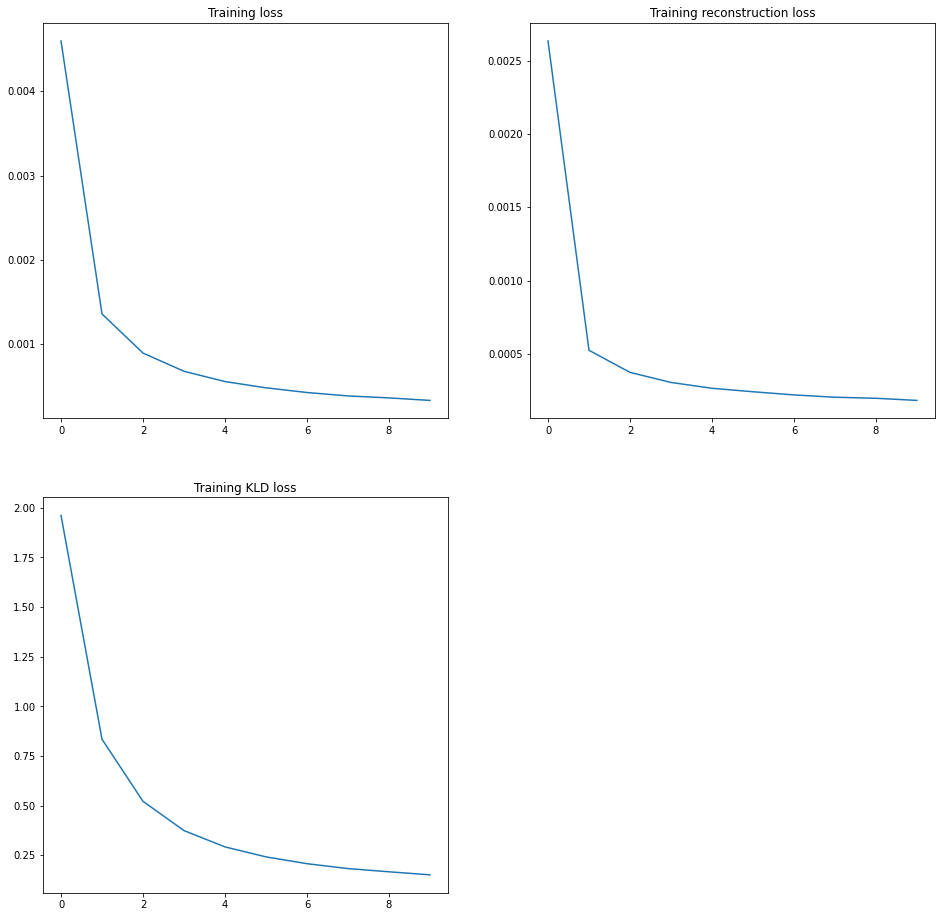

In [38]:
num_list = [i for i in range(epoch_num)]
plt.figure(figsize = (16,16))
plt.subplot(2,2,1)
plt.plot(num_list,running_loss_L2, '-')
plt.title('Training loss')
plt.subplot(2,2,2)
plt.plot(num_list,running_recons_L2, '-')
plt.title('Training reconstruction loss')
plt.subplot(2,2,3)
plt.plot(num_list,running_KLD_L2, '-')
plt.title('Training KLD loss')

In [39]:
val_loss_L2 = [item.detach().cpu().numpy() for item in val_loss_L]
val_loss_L2 = np.array(val_loss_L2)
val_recons_L2 = [item.detach().cpu().numpy() for item in val_recons_L]
val_recons_L2 = np.array(val_recons_L2)
val_KLD_L2 = [item.detach().cpu().numpy() for item in val_KLD_L]
val_KLD_L2 = -np.array(val_KLD_L2)

Text(0.5, 1.0, 'Training KLD loss')

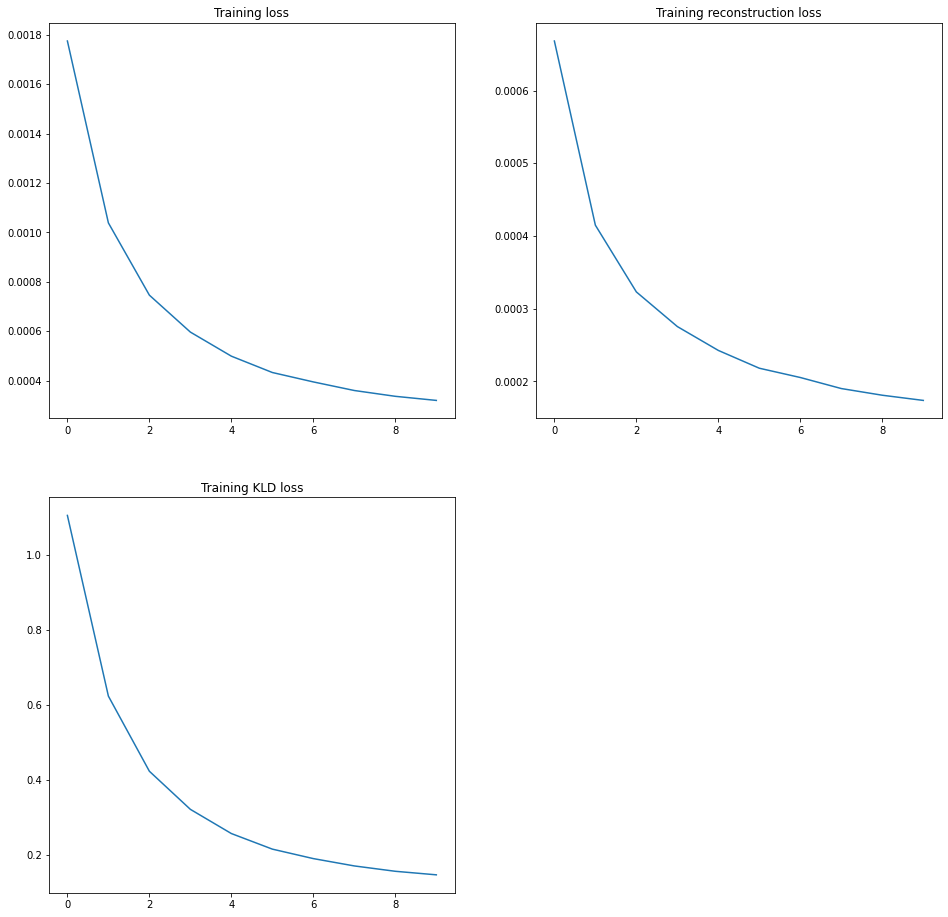

In [41]:
num_list = [i for i in range(epoch_num)]
plt.figure(figsize = (16,16))
plt.subplot(2,2,1)
plt.plot(num_list,val_loss_L2, '-')
plt.title('Training loss')
plt.subplot(2,2,2)
plt.plot(num_list,val_recons_L2, '-')
plt.title('Training reconstruction loss')
plt.subplot(2,2,3)
plt.plot(num_list,val_KLD_L2, '-')
plt.title('Training KLD loss')

In [42]:
input = torch.tensor(func_gm[0:64]).unsqueeze(1).float()
output, input, fg_mu_z, fg_log_var_z = model.forward_fg(input)

Text(0.5, 1.0, 'cVAE gm2 denoised')

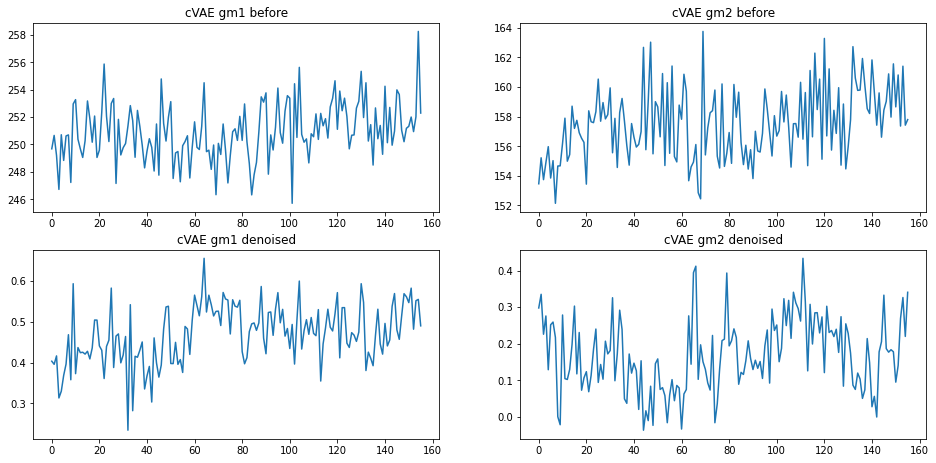

In [47]:
x = [i for i in range(156)]
plt.figure(figsize = (16,16))
plt.subplot(4,2,1)
plt.plot(x,func_gm[20],'-')
plt.title('cVAE gm1 before')
plt.subplot(4,2,2)
plt.plot(x,func_gm[39],'-')
plt.title('cVAE gm2 before')
plt.subplot(4,2,3)
plt.plot(x,output[20].squeeze().detach().numpy(),'-')
plt.title('cVAE gm1 denoised')
plt.subplot(4,2,4)
plt.plot(x,output[39].squeeze().detach().numpy(),'-')
plt.title('cVAE gm2 denoised')